## Question no 3

Data Analysis and Predictive Modeling on Census data [Dataset: adult-modified.csv]
For this problem you will use a simplified version of the Adult Census Data Set. In the subset provided here, some of the attributes have been removed and some preprocessing has been performed.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('E:/OneDrive/MSPA/CSC 478/Assignment/Assignment 2')

In [2]:
df_adult = pd.read_csv('adult-modified.csv', na_values=['?',' ?',' '])
df_adult.shape

(10000, 8)

In [3]:
df_adult.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


Data Analysis and Predictive Modeling on Census data [Dataset: adult-modified.csv]
For this problem you will use a simplified version of the Adult Census Data Set. In the subset provided here, some of the attributes have been removed and some preprocessing has been performed.

In [4]:
df_adult.isnull().sum()

age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.

In [5]:
df_adult.dropna(axis = 0, inplace = True, subset = ['workclass'])
df_adult.shape

(9412, 8)

In [6]:
df_adult.isnull().sum()

age               189
workclass           0
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [7]:
age_mean = df_adult.age.mean()
print 'The mean of age is %0.2f' % age_mean

df_adult.fillna(age_mean, axis = 0, inplace = True)


The mean of age is 38.36


In [8]:
df_adult.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc

In [9]:
df_adult.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,9412,NaN,NaN,NaN,38.3646,12.962,17,28,37,47,90
workclass,9412,3,Private,6947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,9412,NaN,NaN,NaN,10.1253,2.54212,1,9,10,13,16
marital-status,9412,2,Married,4737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,9412,5,White,8062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,9412,2,Male,6383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,9412,NaN,NaN,NaN,41.0802,11.8846,1,40,40,45,99
income,9412,2,<=50K,7093,NaN,NaN,NaN,NaN,NaN,NaN,NaN


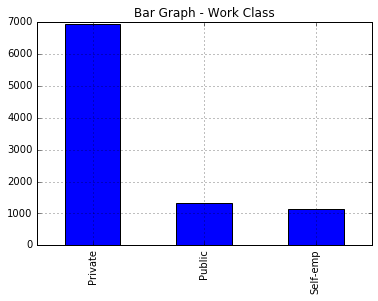

In [10]:
df_adult['workclass'].value_counts().plot(kind = 'bar', title = 'Bar Graph - Work Class', grid = True)

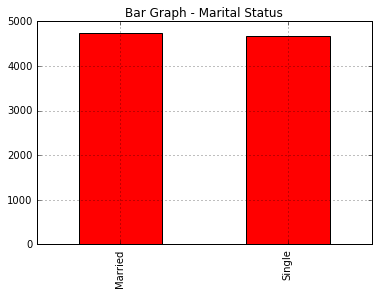

In [11]:
df_adult['marital-status'].value_counts().plot(kind = 'bar', title = 'Bar Graph - Marital Status', grid = True, color = 'red')

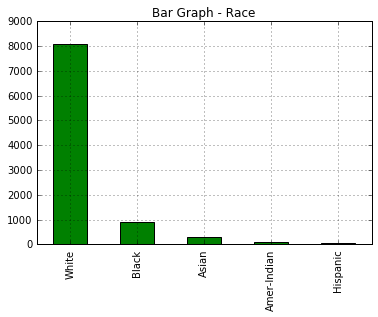

In [12]:
df_adult['race'].value_counts().plot(kind ='bar', title = 'Bar Graph - Race', grid = True, color ='green')

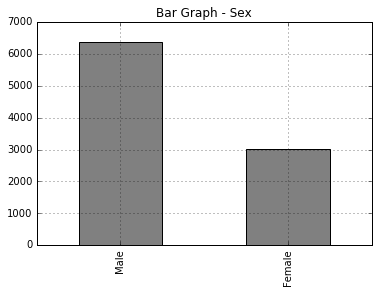

In [13]:
df_adult['sex'].value_counts().plot(kind='bar', title = 'Bar Graph - Sex', grid = True, color = 'gray')

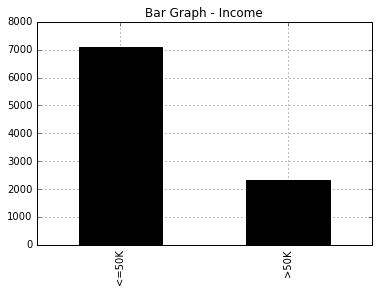

In [14]:
df_adult['income'].value_counts().plot(kind ='bar', title = 'Bar Graph - Income', grid = True, color = 'black')

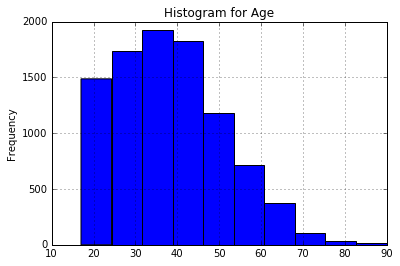

In [15]:
df_adult.age.plot(kind = 'hist', title ='Histogram for Age', label = 'Age', grid =True)

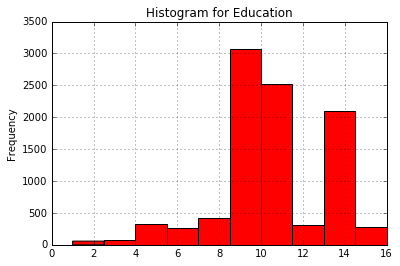

In [16]:
df_adult['education'].plot(kind ='hist', title ='Histogram for Education', label = 'Education', 
                           grid =True, color = 'red')

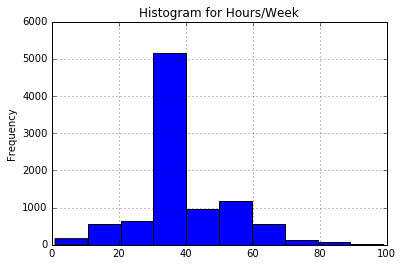

In [17]:
df_adult['hours-per-week'].plot(kind= 'hist', title ='Histogram for Hours/Week', label = 'Hours / Week', grid =True,
                                color = 'blue')

### Cross Tabs
Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis

In [18]:
er = pd.crosstab(df_adult.education, df_adult.race)
er

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


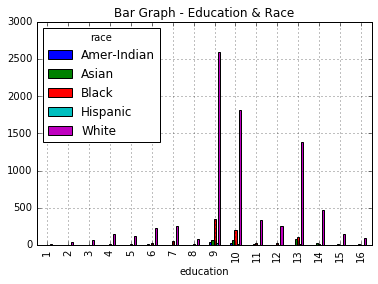

In [19]:
plt.show(er.plot(kind='bar', grid = True, title = 'Bar Graph - Education & Race',  label = 'Education'))

In [22]:
wcr = pd.crosstab(df_adult.workclass, df_adult.race)
wcr

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


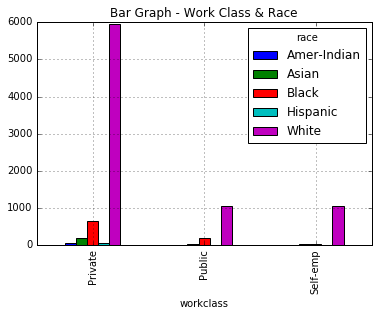

In [23]:
plt.show(wcr.plot(kind='bar', grid = True, title = 'Bar Graph - Work Class & Race',  label = 'WorkClass'))

In [20]:
wci = pd.crosstab(df_adult.workclass, df_adult.income)
wci

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


Based on this graph we can see that majority of the people have an income lower than $50,000. In addition to this, majority of the people are working in Private Companies irrespective of their Income.

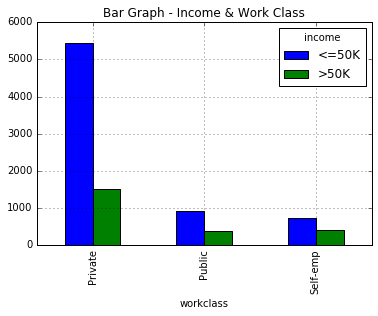

In [21]:
plt.show(wci.plot(kind = 'bar', grid = True, title = 'Bar Graph - Income & Work Class',  label = 'Work Class'))

In [57]:
ri = pd.crosstab(df_adult.race, df_adult.income)
ri

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


Irrespective of the fact who earns more or less, majority of the people in our sample are mostly white. In addition to this, we can see majority of the people have salary lower than 50,000.

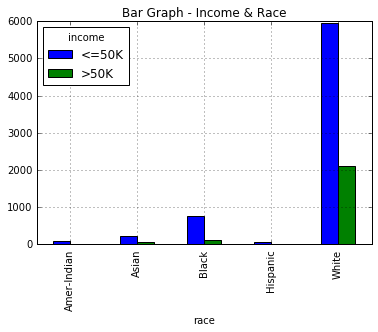

In [58]:
plt.show(ri.plot(kind = 'bar', grid = True, title = 'Bar Graph - Income & Race',  label = 'Race'))

In [60]:
ri['Percentage Under 50K'] = (ri['<=50K']/(ri['<=50K']+ri['>50K'])*100)
ri
                        

income,<=50K,>50K,Percentage Under 50K
race,,,
Amer-Indian,83,9,90.217391
Asian,224,67,76.975945
Black,773,119,86.659193
Hispanic,69,6,92.000000
White,5944,2118,73.728603


In [26]:
df_ri = pd.DataFrame(ri)
df_ri.drop('>50K', axis = 1, inplace= True)
#Compute the percentage 
k = df_ri['<=50K'].sum()
df_ri['Perc'] = (df_ri['<=50K']/k) *100
df_ri

pp["percent_under_50K"] = pp["<=50K"]/(pp["<=50K"]+pp[">50K"])
pp

income,<=50K,Perc
race,,
Amer-Indian,83,1.170168
Asian,224,3.158043
Black,773,10.898069
Hispanic,69,0.972790
White,5944,83.800930


Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).

In [27]:
df_dummy = pd.get_dummies(df_adult)

In [29]:
df_target = np.array(df_dummy['income_>50K'])
df_dum = df_dummy.drop(['income_>50K', 'income_<=50K'], axis = 1)

df_dum.shape

(9412, 15)

In [30]:
df_dum.shape
#df_matrix  = np.array(df_dummy)

(9412, 15)

Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.

In [31]:
from sklearn import naive_bayes, tree

In [32]:
tpercent = 0.8
tsize = int(np.floor(tpercent *len(df_dum)))
df_train = df_dum.iloc[:tsize,:]
df_test = df_dum.iloc[tsize:,:]

# Checking the shape of the file
print df_train.shape
print df_test.shape


df_target_train = df_target[0:int(tsize)]
df_target_test = df_target[int(tsize):len(df_dum)]

print df_target_train.shape
print df_target_test.shape

(7529, 15)
(1883, 15)
(7529L,)
(1883L,)


In [33]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(df_train, df_target_train)
nbpreds_test = nbclf.predict(df_test)
print nbpreds_test

[ 1.  0.  0. ...,  0.  1.  0.]


In [34]:
print 'The accuracy for the Training Set is: %0.2f Percent' % (nbclf.score(df_train, df_target_train)*100)

The accuracy for the Training Set is: 71.63 Percent


In [36]:
print 'The accuracy for the Testing Set is: %0.2f Percent' % (nbclf.score(df_test, df_target_test)*100)

The accuracy for the Testing Set is: 71.91 Percent


In [37]:
from sklearn import cross_validation

In [38]:
nb_class = naive_bayes.GaussianNB()

cv_scores = cross_validation.cross_val_score(nb_class, df_dum, df_target, cv=10)
cv_scores

array([ 0.72823779,  0.70488323,  0.73142251,  0.70456961,  0.73326249,
        0.70669501,  0.7120085 ,  0.7183847 ,  0.73113709,  0.70744681])

In [39]:
print("Overall Accuracy: %0.2f Percent (+/- %0.2f Percent)" % ((cv_scores.mean()*100), (cv_scores.std() * 2)*100))

Overall Accuracy: 71.78 Percent (+/- 2.30 Percent)


In [40]:
treeclf =  tree.DecisionTreeClassifier(criterion= 'entropy', min_samples_split= 3)

In [41]:
treeclf = treeclf.fit(df_train, df_target_train)
treepreds_test = treeclf.predict(df_test)
print treepreds_test

[ 0.  0.  0. ...,  0.  0.  0.]


In [42]:
print 'The Accuracy for Testing Set is: %0.2f Percent' % ((treeclf.score(df_test, df_target_test))*100)

The Accuracy for Testing Set is: 77.80 Percent


In [43]:
print 'The Accuracy for Training Set is: %0.2f Percent' % ((treeclf.score(df_train, df_target_train))*100)

The Accuracy for Training Set is: 93.01 Percent


In [44]:
tree_class = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

cv_scores = cross_validation.cross_val_score(tree_class, df_dum, df_target, cv = 10)
print cv_scores

[ 0.77282378  0.75796178  0.77919321  0.77470776  0.76514346  0.75239107
  0.75876727  0.79489904  0.77683316  0.7606383 ]


In [45]:
print("Overall Accuracy: %0.2f Percent (+/- %0.2f Percent)" % ((cv_scores.mean()*100), ((cv_scores.std() * 2)*100)))

Overall Accuracy: 76.93 Percent (+/- 2.42 Percent)


In [46]:
from sklearn.lda import LDA

C:\Users\Taha\Anaconda2\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [47]:
ldcf = LDA()
ldacf = ldcf.fit(df_train, df_target_train) 
ldapred_test = ldacf.predict(df_test)
print ldapred_test

[ 0.  0.  0. ...,  0.  0.  0.]


C:\Users\Taha\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [48]:
print 'The Accuracy for the Testing set is %0.2f Percent' % (ldacf.score(df_test, df_target_test)*100)

The Accuracy for the Testing set is 82.10 Percent


In [49]:
print 'The Accuracy for the Training set is %0.2f Percent' % (ldacf.score(df_train, df_target_train)*100)

The Accuracy for the Training set is 80.41 Percent


In [50]:
lda_class = LDA()
cv_scores = cross_validation.cross_val_score(lda_class, df_dum, df_target, cv = 10)
cv_scores

array([ 0.81210191,  0.80997877,  0.79193206,  0.81721573,  0.80977683,
        0.78958555,  0.79914984,  0.80871413,  0.82040383,  0.81702128])

In [51]:
print("Overall Accuracy: %0.2f Percent (+/- %0.2f Percent)" % (cv_scores.mean()*100, cv_scores.std() * 200))

Overall Accuracy: 80.76 Percent (+/- 2.02 Percent)


## Extra Credit

In [52]:
from sklearn import tree
from StringIO import StringIO

In [53]:
tree.export_graphviz(treeclf,out_file='tree.dot', max_depth = 2, feature_names=
['age',
 'education',
 'hours-per-week',
 'workclass_Private',
 'workclass_Public',
 'workclass_Self-emp',
 'marital-status_Married',
 'marital-status_Single',
 'race_Amer-Indian',
 'race_Asian', 'race_Black',
 'race_Hispanic',
 'race_White',
 'sex_Female',
 'sex_Male'
 ])

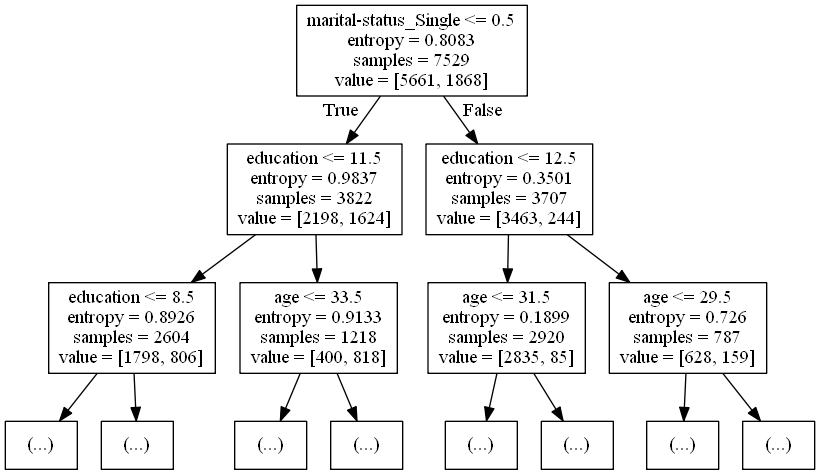

In [54]:
from IPython.display import Image
Image(filename='tree.png')

## Complete Image

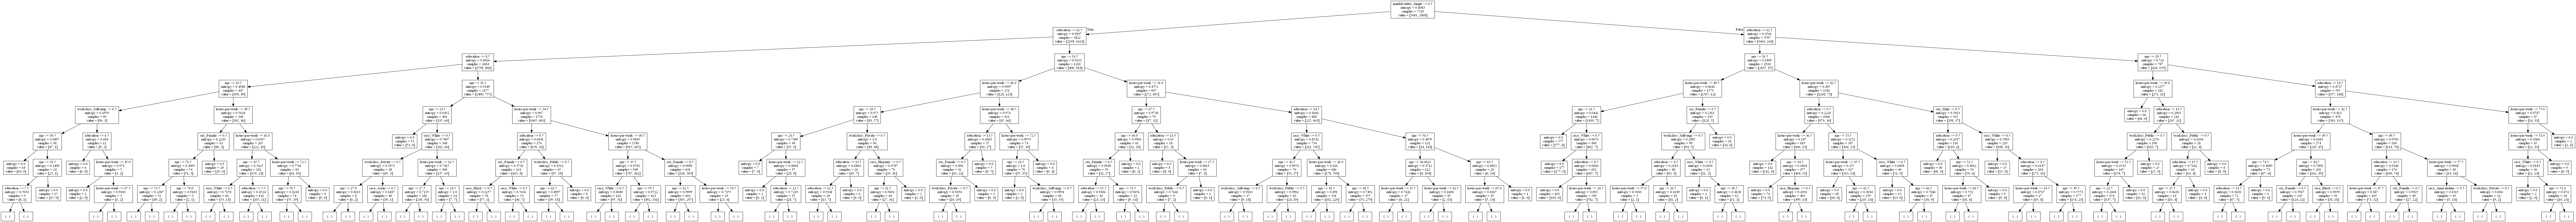

In [55]:
from IPython.display import Image
Image(filename='treeeee12.png')